In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))
d = data.loc[:, ["ir", "lidar"]] # lidarとirだけのデータにする

               ir      lidar
ir     109.394583 -13.444661
lidar  -13.444661  23.408107


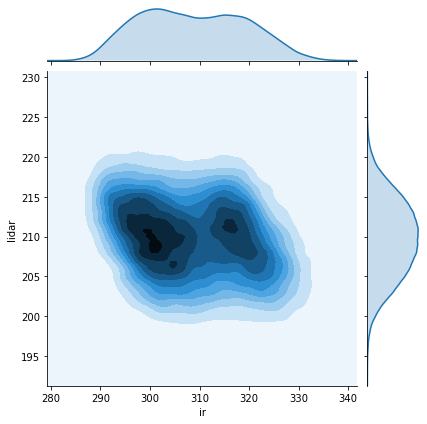

In [6]:
sns.jointplot(d["ir"], d["lidar"], kind="kde")
print(d.cov())
plt.show()

[[280 280 280 ... 280 280 280]
 [281 281 281 ... 281 281 281]
 [282 282 282 ... 282 282 282]
 ...
 [337 337 337 ... 337 337 337]
 [338 338 338 ... 338 338 338]
 [339 339 339 ... 339 339 339]]
[[190 191 192 ... 227 228 229]
 [190 191 192 ... 227 228 229]
 [190 191 192 ... 227 228 229]
 ...
 [190 191 192 ... 227 228 229]
 [190 191 192 ... 227 228 229]
 [190 191 192 ... 227 228 229]]


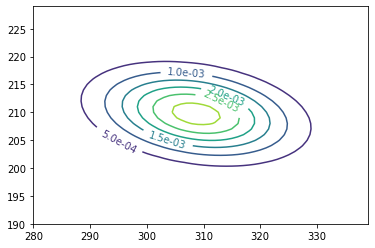

In [7]:
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

print(x)
print(y)

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) # 2次元ガウス分布を作る
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")

plt.show()